### Manipulation of Peaks de novo results of ETNP 2017 P2 samples LC-MS/MS data using python.

Starting with:

    Peaks de novo results (.csv) of PTM-optimized database searches

Goal:

    Files with stripped (no PTMs) peptide lists and
    Columns with #'s of each modification in every sequence
    Column with stripped peptide lengths (# amino acids)
    
### To use:

#### 1. Change the input file name in *IN 4*
#### 2. Change output file name in *IN 6*, *IN 7*, *IN 8*

We don't have technical duplicates here, sadly, unlike the MED4 Pro samples. I exported PeaksDN search results CSVs into my ETNP 2017 git repo:

In [1]:
cd /home/millieginty/Documents/git-repos/2017-etnp/data/pro2020/ETNP-SKQ17/PEAKS-PTMopt/

/home/millieginty/Documents/git-repos/2017-etnp/data/pro2020/ETNP-SKQ17/PEAKS-PTMopt


In [2]:
ls

ETNP-SKQ17-231-100m-0.3-JA2_DN50.csv
ETNP-SKQ17-233-265m-0.3-JA4_DN50.csv
ETNP-SKQ17-243-965m-0.3-JA14_DN50.csv
ETNP-SKQ17-273-965m-trap_DN50.csv
ETNP-SKQ17-273-965m-trap_DN50_stripped.csv
ETNP-SKQ17-273-965m-trap_DN50_stripped_peptides.txt
ETNP-SKQ17-273-965m-trap_DN80_stripped_peptides.txt
ETNP-SKQ17-278-265m-trap_DN50.csv
ETNP-SKQ17-278-265m-trap_DN50_stripped.csv
ETNP-SKQ17-278-265m-trap_DN50_stripped_peptides.txt
ETNP-SKQ17-278-265m-trap_DN80_stripped_peptides.txt
ETNP-SKQ17-378-100m-trap_DN50.csv
ETNP-SKQ17-378-100m-trap_DN50_stripped.csv


In [3]:
# LIBRARIES
#import pandas library for working with tabular data
import os
os.getcwd()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kde
#import regular expresson (regex)
import re
#check pandas version
pd.__version__

'1.0.5'

## 378: 100 m +P filtered on 0.3 um GF-75

In [4]:
#read the CSV into a datadrame we name 'comet' using the pandas read_csv function
peaks = pd.read_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/pro2020/ETNP-SKQ17/PEAKS-PTMopt/ETNP-SKQ17-378-100m-trap_DN50.csv")


#look at the dataframe
peaks.head()

,Fraction,Scan,Source File,Peptide,Tag Length,ALC (%),length,m/z,z,RT,Area,Mass,ppm,PTM,local confidence (%),tag (>=0%),mode
0,4,4564,20181214_378_etnp2017_100m_trap.raw,VVEEAPK,7,99,7,386.2155,2,17.85,800000.0,770.4174,-1.1,NaN,99 99 100 100 99 99 99,VVEEAPK,CID
1,4,4574,20181214_378_etnp2017_100m_trap.raw,SLEAESR,7,98,7,396.1982,2,17.88,513000.0,790.3821,-0.4,NaN,98 99 100 99 99 98 96,SLEAESR,CID
2,4,4982,20181214_378_etnp2017_100m_trap.raw,EEDLER,6,98,6,395.6826,2,19.14,245000.0,789.3504,0.3,NaN,100 100 98 99 99 95,EEDLER,CID
3,4,3812,20181214_378_etnp2017_100m_trap.raw,TEEAVEEK,8,98,8,467.7217,2,15.60,232000.0,933.4291,-0.2,NaN,99 100 100 99 97 99 99 90,TEEAVEEK,CID
4,4,3992,20181214_378_etnp2017_100m_trap.raw,ELAGNAAR,8,97,8,401.2144,2,16.13,485000.0,800.4140,0.3,NaN,98 96 99 97 98 99 99 98,ELAGNAAR,CID


In [5]:
# use a count function to enumerate the # of ccarbamidomethylated C's in each peptide
peaks['c-carb'] = peaks['Peptide'].str.count("57.02")

# use a count function to enumerate the # of oxidized M's in each peptide
peaks['m-oxid'] = peaks['Peptide'].str.count("15.99")

# use a lamba function to enumerate the # of deamidated N's in each peptide
# used to use peaks['n-deam'] = peaks['Peptide'].str.count("N\(+.98") but that didn't work with the 'N'

peaks['n-deam'] = peaks['Peptide'].apply(lambda x: x.count('N(+.98)'))

# use a count function to enumerate the # of deamidated Q's in each peptide
peaks['q-deam'] = peaks['Peptide'].apply(lambda x: x.count('Q(+.98)'))

# use a count function to enumerate the # of hydroxylated K's in each peptide
peaks['k-hydr'] = peaks['Peptide'].apply(lambda x: x.count('K(+15.99)'))

# use a count function to enumerate the # of hydroxylated P's in each peptide
peaks['p-hydr'] = peaks['Peptide'].apply(lambda x: x.count('P(+15.99)'))

# use a count function to enumerate the # of methylated K's in each peptide
peaks['k-meth'] = peaks['Peptide'].apply(lambda x: x.count('K(+14.02)'))

# use a count function to enumerate the # of methylated R's in each peptide
peaks['r-meth'] = peaks['Peptide'].apply(lambda x: x.count('R(+14.02)'))

# create a column with 'stripped' peptide sequences using strip
peaks['stripped peptide'] = peaks['Peptide'].str.replace(r"\(.*\)","")

# add a column with the stripped peptide length (number of AAs)
peaks['stripped length'] = peaks['stripped peptide'].apply(len)

# total the number of modifications in sequence
peaks['ptm-total'] = peaks['c-carb'] + peaks['m-oxid'] + peaks['n-deam'] + peaks['q-deam'] + peaks['k-hydr'] + peaks['p-hydr'] + peaks['k-meth'] + peaks['r-meth']

# total the number of modifications in sequence relative to # of AAs
peaks['ptm-norm'] = peaks['ptm-total'] / peaks['stripped length']

# write modified dataframe to new txt file, same name + 'stripped'
peaks.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/pro2020/ETNP-SKQ17/PEAKS-PTMopt/ETNP-SKQ17-378-100m-trap_DN50_stripped.csv")


# check out the results
peaks.head()

,Fraction,Scan,Source File,Peptide,Tag Length,ALC (%),length,m/z,z,RT,...,n-deam,q-deam,k-hydr,p-hydr,k-meth,r-meth,stripped peptide,stripped length,ptm-total,ptm-norm
0,4,4564,20181214_378_etnp2017_100m_trap.raw,VVEEAPK,7,99,7,386.2155,2,17.85,...,0,0,0,0,0,0,VVEEAPK,7,0,0.0
1,4,4574,20181214_378_etnp2017_100m_trap.raw,SLEAESR,7,98,7,396.1982,2,17.88,...,0,0,0,0,0,0,SLEAESR,7,0,0.0
2,4,4982,20181214_378_etnp2017_100m_trap.raw,EEDLER,6,98,6,395.6826,2,19.14,...,0,0,0,0,0,0,EEDLER,6,0,0.0
3,4,3812,20181214_378_etnp2017_100m_trap.raw,TEEAVEEK,8,98,8,467.7217,2,15.60,...,0,0,0,0,0,0,TEEAVEEK,8,0,0.0
4,4,3992,20181214_378_etnp2017_100m_trap.raw,ELAGNAAR,8,97,8,401.2144,2,16.13,...,0,0,0,0,0,0,ELAGNAAR,8,0,0.0


### Visualizing the results

In [6]:
print("ALC max: ", peaks['ALC (%)'].max())
print("ALC min: ", peaks['ALC (%)'].min())

ALC max:  99
ALC min:  50


Text(0.5, 1.0, 'Arginine methylation')

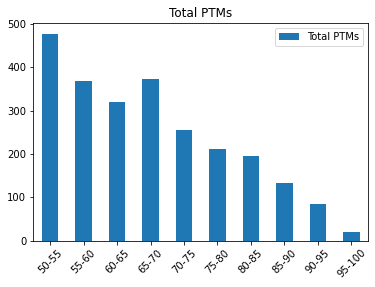

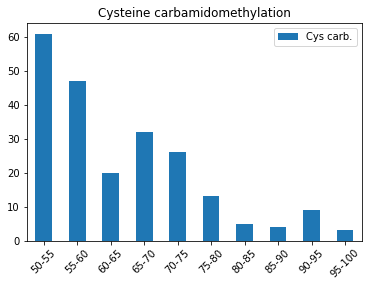

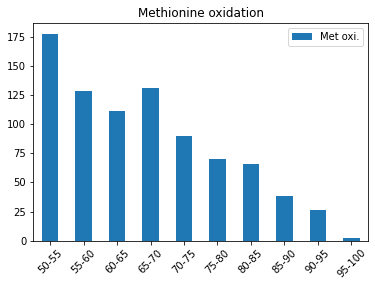

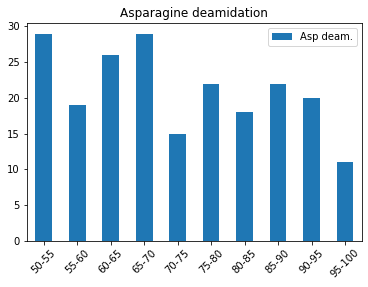

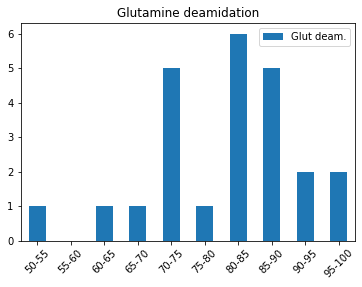

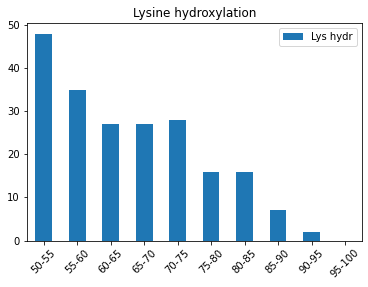

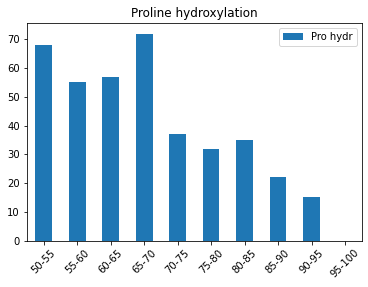

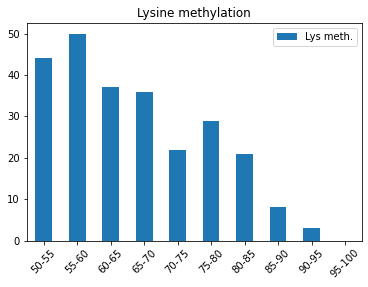

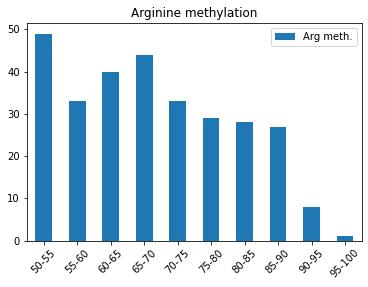

In [39]:
# making evenly spaced bins for the ALC data based on the min and max, called above
bins = [50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
labels = ['50-55', '55-60', '60-65', '65-70', '70-75', '75-80', '80-85', '85-90', '90-95', '95-100']

# use pandas cut function to do the binning itself
peaks['binned'] = pd.cut(peaks['ALC (%)'], bins=bins, labels=labels)

# bar plots of binned PTM data

index = ['50-55', '55-60', '60-65', '65-70', '70-75', '75-80', '80-85', '85-90', '90-95', '95-100']
data = {'Total PTMs': [peaks.groupby('binned')['ptm-total'].sum()['50-55'], peaks.groupby('binned')['ptm-total'].sum()['55-60'], peaks.groupby('binned')['ptm-total'].sum()['60-65'], peaks.groupby('binned')['ptm-total'].sum()['65-70'], peaks.groupby('binned')['ptm-total'].sum()['70-75'], peaks.groupby('binned')['ptm-total'].sum()['75-80'], peaks.groupby('binned')['ptm-total'].sum()['80-85'], peaks.groupby('binned')['ptm-total'].sum()['85-90'], peaks.groupby('binned')['ptm-total'].sum()['90-95'], peaks.groupby('binned')['ptm-total'].sum()['95-100']],
        'Cys carb.': [peaks.groupby('binned')['c-carb'].sum()['50-55'], peaks.groupby('binned')['c-carb'].sum()['55-60'], peaks.groupby('binned')['c-carb'].sum()['60-65'], peaks.groupby('binned')['c-carb'].sum()['65-70'], peaks.groupby('binned')['c-carb'].sum()['70-75'], peaks.groupby('binned')['c-carb'].sum()['75-80'], peaks.groupby('binned')['c-carb'].sum()['80-85'], peaks.groupby('binned')['c-carb'].sum()['85-90'], peaks.groupby('binned')['c-carb'].sum()['90-95'], peaks.groupby('binned')['c-carb'].sum()['95-100']],
        'Met oxi.': [peaks.groupby('binned')['m-oxid'].sum()['50-55'], peaks.groupby('binned')['m-oxid'].sum()['55-60'], peaks.groupby('binned')['m-oxid'].sum()['60-65'], peaks.groupby('binned')['m-oxid'].sum()['65-70'], peaks.groupby('binned')['m-oxid'].sum()['70-75'], peaks.groupby('binned')['m-oxid'].sum()['75-80'], peaks.groupby('binned')['m-oxid'].sum()['80-85'], peaks.groupby('binned')['m-oxid'].sum()['85-90'], peaks.groupby('binned')['m-oxid'].sum()['90-95'], peaks.groupby('binned')['m-oxid'].sum()['95-100']],
        'Asp deam.': [peaks.groupby('binned')['n-deam'].sum()['50-55'], peaks.groupby('binned')['n-deam'].sum()['55-60'], peaks.groupby('binned')['n-deam'].sum()['60-65'], peaks.groupby('binned')['n-deam'].sum()['65-70'], peaks.groupby('binned')['n-deam'].sum()['70-75'], peaks.groupby('binned')['n-deam'].sum()['75-80'], peaks.groupby('binned')['n-deam'].sum()['80-85'], peaks.groupby('binned')['n-deam'].sum()['85-90'], peaks.groupby('binned')['n-deam'].sum()['90-95'], peaks.groupby('binned')['n-deam'].sum()['95-100']],
        'Glut deam.': [peaks.groupby('binned')['q-deam'].sum()['50-55'], peaks.groupby('binned')['q-deam'].sum()['55-60'], peaks.groupby('binned')['q-deam'].sum()['60-65'], peaks.groupby('binned')['q-deam'].sum()['65-70'], peaks.groupby('binned')['q-deam'].sum()['70-75'], peaks.groupby('binned')['q-deam'].sum()['75-80'], peaks.groupby('binned')['q-deam'].sum()['80-85'], peaks.groupby('binned')['q-deam'].sum()['85-90'], peaks.groupby('binned')['q-deam'].sum()['90-95'], peaks.groupby('binned')['q-deam'].sum()['95-100']],
        'Lys hydr': [peaks.groupby('binned')['k-hydr'].sum()['50-55'], peaks.groupby('binned')['k-hydr'].sum()['55-60'], peaks.groupby('binned')['k-hydr'].sum()['60-65'], peaks.groupby('binned')['k-hydr'].sum()['65-70'], peaks.groupby('binned')['k-hydr'].sum()['70-75'], peaks.groupby('binned')['k-hydr'].sum()['75-80'], peaks.groupby('binned')['k-hydr'].sum()['80-85'], peaks.groupby('binned')['k-hydr'].sum()['85-90'], peaks.groupby('binned')['k-hydr'].sum()['90-95'], peaks.groupby('binned')['k-hydr'].sum()['95-100']],
        'Pro hydr': [peaks.groupby('binned')['p-hydr'].sum()['50-55'], peaks.groupby('binned')['p-hydr'].sum()['55-60'], peaks.groupby('binned')['p-hydr'].sum()['60-65'], peaks.groupby('binned')['p-hydr'].sum()['65-70'], peaks.groupby('binned')['p-hydr'].sum()['70-75'], peaks.groupby('binned')['p-hydr'].sum()['75-80'], peaks.groupby('binned')['p-hydr'].sum()['80-85'], peaks.groupby('binned')['p-hydr'].sum()['85-90'], peaks.groupby('binned')['p-hydr'].sum()['90-95'], peaks.groupby('binned')['p-hydr'].sum()['95-100']],
        'Lys meth.': [peaks.groupby('binned')['k-meth'].sum()['50-55'], peaks.groupby('binned')['k-meth'].sum()['55-60'], peaks.groupby('binned')['k-meth'].sum()['60-65'], peaks.groupby('binned')['k-meth'].sum()['65-70'], peaks.groupby('binned')['k-meth'].sum()['70-75'], peaks.groupby('binned')['k-meth'].sum()['75-80'], peaks.groupby('binned')['k-meth'].sum()['80-85'], peaks.groupby('binned')['k-meth'].sum()['85-90'], peaks.groupby('binned')['k-meth'].sum()['90-95'], peaks.groupby('binned')['k-meth'].sum()['95-100']],
        'Arg meth.': [peaks.groupby('binned')['r-meth'].sum()['50-55'], peaks.groupby('binned')['r-meth'].sum()['55-60'], peaks.groupby('binned')['r-meth'].sum()['60-65'], peaks.groupby('binned')['r-meth'].sum()['65-70'], peaks.groupby('binned')['r-meth'].sum()['70-75'], peaks.groupby('binned')['r-meth'].sum()['75-80'], peaks.groupby('binned')['r-meth'].sum()['80-85'], peaks.groupby('binned')['r-meth'].sum()['85-90'], peaks.groupby('binned')['r-meth'].sum()['90-95'], peaks.groupby('binned')['r-meth'].sum()['95-100']]
        }

peaksbin = pd.DataFrame(data, columns=['Total PTMs','Cys carb.','Met oxi.','Asp deam.', 'Glut deam.', 'Lys hydr', 'Pro hydr', 'Lys meth.', 'Arg meth.'], index=index)

# write the peaks bin ptm dataframe to a csv:
peaksbin.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/pro2020/ETNP-SKQ17/PEAKS-PTMopt/ETNP-SKQ17-378-100m-trap_DN50_ptm.csv")

ax1 = peaksbin.plot.bar(y='Total PTMs', rot=45)
ax1.set_title('Total PTMs')

ax2 = peaksbin.plot.bar(y='Cys carb.', rot=45)
ax2.set_title('Cysteine carbamidomethylation')

ax3 = peaksbin.plot.bar(y='Met oxi.', rot=45)
ax3.set_title('Methionine oxidation')

ax4 = peaksbin.plot.bar(y='Asp deam.', rot=45)
ax4.set_title('Asparagine deamidation')

ax5 = peaksbin.plot.bar(y='Glut deam.', rot=45)
ax5.set_title('Glutamine deamidation')

ax6 = peaksbin.plot.bar(y='Lys hydr', rot=45)
ax6.set_title('Lysine hydroxylation')

ax7 = peaksbin.plot.bar(y='Pro hydr', rot=45)
ax7.set_title('Proline hydroxylation')

ax8 = peaksbin.plot.bar(y='Lys meth.', rot=45)
ax8.set_title('Lysine methylation')

ax9 = peaksbin.plot.bar(y='Arg meth.', rot=45)
ax9.set_title('Arginine methylation')


In [49]:
peaksbin['Total PTMs'] = pd.to_numeric(peaksbin['Total PTMs'])

peaksbin.loc['sums'] = peaksbin.sum(numeric_only=True, axis=0)

peaksbin.loc['rel'] = peaksbin.div(2)['sums']

print(peaksbin)

        Total PTMs  Cys carb.  Met oxi.  Asp deam.  Glut deam.  Lys hydr  \
50-55        478.0       61.0     178.0       29.0         1.0      48.0   
55-60        368.0       47.0     129.0       19.0         0.0      35.0   
60-65        319.0       20.0     111.0       26.0         1.0      27.0   
65-70        372.0       32.0     131.0       29.0         1.0      27.0   
70-75        256.0       26.0      90.0       15.0         5.0      28.0   
75-80        212.0       13.0      70.0       22.0         1.0      16.0   
80-85        195.0        5.0      66.0       18.0         6.0      16.0   
85-90        133.0        4.0      38.0       22.0         5.0       7.0   
90-95         85.0        9.0      26.0       20.0         2.0       2.0   
95-100        19.0        3.0       2.0       11.0         2.0       0.0   
sums       17059.0     1540.0    5887.0     1477.0       168.0    1442.0   
rel            NaN        NaN       NaN        NaN         NaN       NaN   

        Pro

In [37]:
# make a new dataframe of relative PTM occurance

# fist pass as numeric
peaks['ptm-total', 'c-carb'] = pd.to_numeric(peaks['ptm-total', 'c-carb'])

data = {'1': [peaks['ptm-total'].sum()], '2': [peaks['c-carb'].sum()]}
#data = {peaks[['ptm-total', 'c-carb', 'm-oxid', 'n-deam', 'q-deam', 'k-hydr', 'p-hydr', 'k-meth', 'r-meth' ]].sum()}

ptmrel = pd.DataFrame(data, columns = ['1', '2'])

ptmrel.head()

KeyError: ('ptm-total', 'c-carb')

### Exporting txt files of stripped peptides at confidence cutoffs:

In [9]:
# keep only peptide column >50% ALC
pep = peaks[["stripped peptide"]]

# write altered dataframe to new txt file
# used header and index parameters to get rid of 'Peptide' header and the indexing

pep.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/pro2020/ETNP-SKQ17/PEAKS-PTMopt/ETNP-SKQ17-378-100m-trap_DN50_stripped_peptides.txt", header=False, index=False)


# look

print("# of DN peptide >50% ALC", len(pep))
pep.head()

# of DN peptide >50% ALC 1590


,stripped peptide
0,VVEEAPK
1,SLEAESR
2,EEDLER
3,TEEAVEEK
4,ELAGNAAR


In [13]:
# keep only peptides  >80% ALC
peaks80 = peaks.loc[peaks['ALC (%)'] >= 80]

# see how many rows and double check
# peaks80.head(-10)

# keep only peptide column 
pep80 = peaks80[["stripped peptide"]]

# write altered dataframe to new txt file
# used header and index parameters to get rid of 'Peptide' header and the indexing

pep80.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/pro2020/ETNP-SKQ17/PEAKS-PTMopt/ETNP-SKQ17-378-100m-trap_DN80_stripped_peptides.txt", header=False, index=False)


print("# of DN peptide >80% ALC", len(pep80))
pep80.head()

# of DN peptide >80% ALC 465


,stripped peptide
0,VVEEAPK
1,SLEAESR
2,EEDLER
3,TEEAVEEK
4,ELAGNAAR
